# Human Written Text vs. AI Generated Text
### INF582
Hugo BOUIGEON, Thomas LI, Jules POTEL





---

# Statistical Models

---

# Imports

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import csv
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import os

In [2]:
# Read the data
training_set = pd.read_json('./train_set.json')
test_set = pd.read_json('./test_set.json')

In [3]:
# prepare datasets

X_vectors = {}
for i in [10, 100, 1000, 10000, 31865]:
    X_vectors[f'tfidf_{i}'] = TfidfVectorizer(max_features=i).fit_transform(training_set['text'])

X_vectors['word_count'] = CountVectorizer().fit_transform(training_set['text'])

y = training_set['label']

In [19]:
# Prepare parameter grid

fat_grid = {
    'Logistic-Regression':{
        'estimator':LogisticRegression(),
        'param_grid':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'max_iter':[10, 100, 1000],
            'solver':['lbfgs', 'liblinear']
        }
    },
    'Decision-Tree':{
        'estimator':DecisionTreeClassifier(),
        'param_grid':{
            'min_samples_split':[2, 4, 8, 16, 32],
            'min_samples_leaf':[2, 4, 8, 16, 32],
            'max_depth':[1, 2, 4, 8, 16, 32],
            'max_features':['sqrt', 'log2', None],
            'criterion':['gini', 'entropy']
        }
    },
    'Random-Forest':{
        'estimator':RandomForestClassifier(),
        'param_grid':{
            "n_estimators": [50, 200],
            "max_depth": [2, 4, 8],
            "min_samples_split": [2, 6, 10],
            "min_samples_leaf": [1, 5, 10],
            "criterion": ['gini', 'entropy'],
            "max_features": ['sqrt', 'log2']
        }
    },
    'Gradient-Boosting':{
        'estimator':GradientBoostingClassifier(),
        'param_grid':{
            "n_estimators": [50, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [2, 8],
            "min_samples_split": [2, 6, 10],
            "min_samples_leaf": [1, 5, 10],
            "max_features": ['sqrt', 'log2'],
            "subsample": [0.2, 0.8]
        }
    }
}

In [20]:
# Fit the classifiers

for vec, X in X_vectors.items():
    print(f'Testing with {vec}')

    for model_name in fat_grid.keys():
        print(f'Testing for {model_name}')

        if not os.path.exists(f'results/results_{vec}_{model_name}.csv'):

            clf = GridSearchCV(**fat_grid[model_name], verbose=2)
            clf.fit(X, y)

            res = pd.DataFrame(clf.cv_results_).sort_values('rank_test_score')
            res.to_csv(f'results/results_{vec}_{model_name}.csv')

Testing with tfidf_10
Testing for Logistic-Regression
Testing for Decision-Tree
Testing for Random-Forest
Testing for Gradient-Boosting
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END learning_rate=0.01, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.2; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.2; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.2; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.2; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, subsample=0.2; total time=   0.1s
[CV] END learning_rate=0.01, max_de

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END ...C=0.1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=0.1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, 

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
315 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sk

[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_sam

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END ...C=0.1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=0.1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=0.1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=0.1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=0.1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, 

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=100, max_iter=10,

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=1000, max_iter=

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] E

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
315 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sk

[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=32; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=32; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=32; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, 

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, 

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, ma

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] E

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
315 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sk

[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_sam

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, 

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, 

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] E

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
315 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sk

Testing for Decision-Tree
Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_sp

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END .....C=0.001, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=0.001, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.2s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END .....C=0.001, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=0.001, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=0.001, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .C=0.001, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.001, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.001, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] E

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END ..C=0.01, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=0.01, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.01, max_iter=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/

[CV] END .......C=0.1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .......C=0.1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .......C=0.1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END .......C=0.1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .......C=0.1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...C=0.1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=0.1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=0.1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=0.1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=0.1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_ite

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=1, max_iter=10, penalty=l1, solver=liblinear; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.2s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .........C=1, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....C=1, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, max_iter

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, max_iter=1

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=10, max_iter=10, penalty=l1, solver=liblinear; total time=   0.0s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ........C=10, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=10, max_iter=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=10, 

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, max

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

[CV] END ...C=100, max_iter=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.0s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=100, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.2s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.2s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.2s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...C=100, max_iter=10, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=1000, max_iter=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.2s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=1000, max_iter=10, penalty=l2, solver=lbfgs; total time=   0.1s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.2s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.2s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..C=1000, max_iter=10, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000, max_iter=10, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .....C=1000, max_iter=100, penalty=l1, solver=lbfgs; total t

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s


/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1000, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .C=1000, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] E

/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
315 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/juluis/anaconda3/envs/INF582/lib/python3.10/site-packages/sk

[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=16; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=16; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=16; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=sqrt, min_

In [32]:
# Get the results

model_name = ['Logistic-Regression', 'Decision-Tree', 'Random-Forest', 'Gradient-Boosting']

best_results = []
for model in model_name:
    for vec in ['tfidf', 'word_count']:
        if vec == 'tfidf':
            for i in [10, 100, 1000, 10000, 31865]:
                if os.path.exists(f'results/results_{vec}_{i}_{model}.csv'):
                    best_res = pd.read_csv(f'results/results_{vec}_{i}_{model}.csv').loc[0, 'mean_test_score']
                    best_results.append([model, vec, i, best_res])

        else:
            if os.path.exists(f'results/results_{vec}_{model}.csv'):
                best_res = pd.read_csv(f'results/results_{vec}_{model}.csv').loc[0, 'mean_test_score']
                best_results.append([model, vec, 31865, best_res])

result_table = pd.DataFrame(best_results, columns=['Model', 'Vectorizer', 'N_features', 'Result'])
print(result_table)

                  Model  Vectorizer  N_features   Result
0   Logistic-Regression       tfidf          10  0.56575
1   Logistic-Regression       tfidf         100  0.60375
2   Logistic-Regression       tfidf        1000  0.62075
3   Logistic-Regression       tfidf       10000  0.62100
4   Logistic-Regression       tfidf       31865  0.61900
5   Logistic-Regression  word_count       31865  0.63150
6         Decision-Tree       tfidf          10  0.57100
7         Decision-Tree       tfidf         100  0.59200
8         Decision-Tree       tfidf        1000  0.59425
9         Decision-Tree       tfidf       10000  0.60550
10        Decision-Tree       tfidf       31865  0.60700
11        Decision-Tree  word_count       31865  0.63475
12        Random-Forest       tfidf          10  0.59550
13        Random-Forest       tfidf         100  0.64675
14        Random-Forest       tfidf        1000  0.64475
15        Random-Forest       tfidf       10000  0.64875
16        Random-Forest       t

/tmp/ipykernel_325/3389663082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_table.groupby(['Vectorizer', 'N_features']).mean().loc['tfidf', :].plot(ylabel='average score', logx=True)


<AxesSubplot: xlabel='N_features', ylabel='average score'>

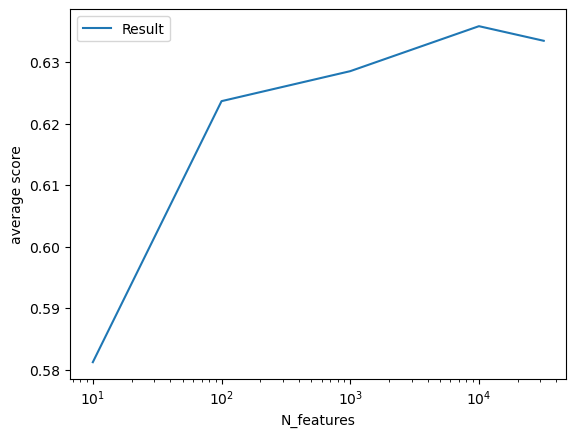

In [35]:
result_table.groupby(['Vectorizer', 'N_features']).mean().loc['tfidf', :].plot(ylabel='average score', logx=True)